In [ ]:
# Подгрузим пакеты
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

### Задача 1.1
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам. Какие выводы можно сделать, понаблюдав за тем, как распределены данные и что показывают тесты?

In [ ]:
df = pd.DataFrame([[25, 45, 30, 54],
                   [30, 55, 29, 60],
                   [28, 29, 33, 51],
                   [36, 56, 37, 62],
                   [29, 40, 27, 73]],
                   columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !=(A=B=C=D)


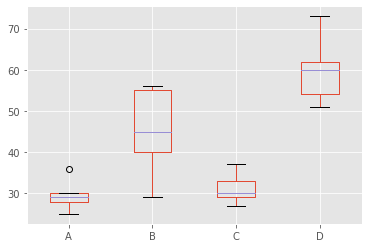

In [ ]:
df.boxplot()
print('Нулевая гипотеза:', '='.join(df))
print('Альтернативная гипотеза:', f'!=({"=".join(df)})')

In [ ]:
stats.f_oneway(*df.values.T)

F_onewayResult(statistic=17.492810457516338, pvalue=2.639241146210922e-05)

In [ ]:
# по расчетам значение статистики получилось менее 5%, следовательно результаты наблюдений по четырём группам сильно отличаются (нулевую гипотезу отклоняем).
# из визуализации также видно, что нулевую гипотезу нужно отклонять, поскольку основная часть данных не пересекается.

### Задача 1.2    
    
Есть данные об измерении раковины у мидии Mytilus trossulus из пяти мест:
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные.
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [ ]:
print(len(tillamook), len(newport), len(petersburg), len(magadan), len(tvarminne))

10 8 7 8 6


In [ ]:
a = {'tillamook': [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836],
'newport' : [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725],
'petersburg' : [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105],
'magadan' : [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689],
'tvarminne' : [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]}
df_1 = pd.DataFrame.from_dict(a, orient='index').T
df_1

,tillamook,newport,petersburg,magadan,tvarminne
0,0.0571,0.0873,0.0974,0.1033,0.0703
1,0.0813,0.0662,0.1352,0.0915,0.1026
2,0.0831,0.0672,0.0817,0.0781,0.0956
3,0.0976,0.0819,0.1016,0.0685,0.0973
4,0.0817,0.0749,0.0968,0.0677,0.1039
5,0.0859,0.0649,0.1064,0.0697,0.1045
6,0.0735,0.0835,0.1050,0.0764,NaN
7,0.0659,0.0725,NaN,0.0689,NaN
8,0.0923,NaN,NaN,NaN,NaN
9,0.0836,NaN,NaN,NaN,NaN


Нулевая гипотеза: tillamook=newport=petersburg=magadan=tvarminne
Альтернативная гипотеза: !=(tillamook=newport=petersburg=magadan=tvarminne)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


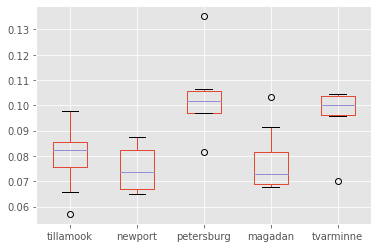

In [ ]:
df_1.boxplot()
print('Нулевая гипотеза:', '='.join(df_1))
print('Альтернативная гипотеза:', f'!=({"=".join(df_1)})')

In [ ]:
stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [ ]:
# по расчетам значение статистики получилось менее 5%, следовательно нулевую гипотезу отклоняем.
# из визуализации также видно, что нулевую гипотезу нужно отклонять, поскольку основная часть данных не пересекается.

Визуально данные можно разделить на две группы. Первая группа: petersburg+tvarminne. Вторая группа: tillamook+newport+magadan

In [ ]:
group_1 = petersburg + tvarminne
group_2 = tillamook + newport + magadan


In [ ]:
b= {'group_1': group_1, 'group_2': group_2 }
df_2 = pd.DataFrame.from_dict(b, orient='index').T
df_2

,group_1,group_2
0,0.0974,0.0571
1,0.1352,0.0813
2,0.0817,0.0831
3,0.1016,0.0976
4,0.0968,0.0817
5,0.1064,0.0859
6,0.1050,0.0735
7,0.0703,0.0659
8,0.1026,0.0923
9,0.0956,0.0836


Нулевая гипотеза: group_1=group_2
Альтернативная гипотеза: !=(group_1=group_2)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


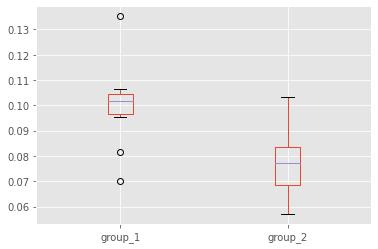

In [ ]:
df_2.boxplot()
print('Нулевая гипотеза:', '='.join(df_2))
print('Альтернативная гипотеза:', f'!=({"=".join(df_2)})')

In [ ]:
stats.f_oneway(group_1, group_2)

F_onewayResult(statistic=27.15019490567671, pvalue=7.34681747128626e-06)

In [ ]:
# по расчетам значение статистики получилось менее 5%, следовательно нулевую гипотезу отклоняем.
# из визуализации также видно, что нулевую гипотезу нужно отклонять, поскольку  данныt не пересекаются.

# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.




### Задание 2.1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [ ]:
# поскольку дано две выборки с нормальным распределением, можно применить t-тест Стьюдента (по карте стат. тестов гипотез)
# loc- среднее значение, scale - дисперсия

Нулевая гипотеза: A=B
Альтернативная гипотеза: !=(A=B)


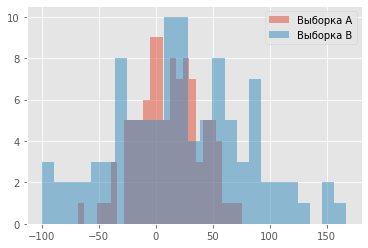

In [ ]:
plt.hist(A, bins=25,label='Выборка A', alpha=0.5);
plt.hist(B, bins=25,label='Выборка B', alpha=0.5);
plt.legend()
data = ('A', 'B')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
stats.ttest_ind(A, B, equal_var = False) # если True, выполните стандартный независимый t-критерий с двумя выборками, который предполагает равные дисперсии генеральной совокупности.

Ttest_indResult(statistic=-1.7338006472109972, pvalue=0.08511123469659897)

In [ ]:
# Из значения p_value при уровне значимости 5% следует, что мы принимаем нулевую гипотезу об одинаковом эффекте у пациентов.
# Визуально видно, что диапазон эффекта от препарата B отличается бОльшим разнообразием, чем от препарата А.
# При этом можно подтвердить одинаковый эффект у пациентов, поскольку подавляющее большинство значений выборки А совпадает с частью значений выборки В.

### Задание 2.2

Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей до применения препарата.

`B` - та же группа людей, но после применения препарата.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# будем использовать парный выборочный t-критерий


Нулевая гипотеза: A=B
Альтернативная гипотеза: !=(A=B)


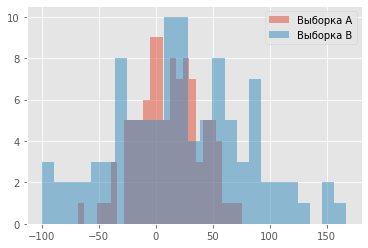

In [ ]:
plt.hist(A, bins=25,label='Выборка A', alpha=0.5);
plt.hist(B, bins=25,label='Выборка B', alpha=0.5);
plt.legend()
data = ('A', 'B')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
stats.ttest_rel(a=A, b=B)

Ttest_relResult(statistic=-2.1701703735210716, pvalue=0.03238579156467659)

In [ ]:
# Из значения p_value при уровне значимости 5% следует, что мы отклоняем нулевую гипотезу об одинаковом эффекте у пациентов.
# Визуально видно, что есть различие в эффекте у пациентов до и после применения препарата.

### Задание 2.3

Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.

In [ ]:
print(len(water), len(nutri), len(mineral))

20 21 21


Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !=(water=nutri=mineral)


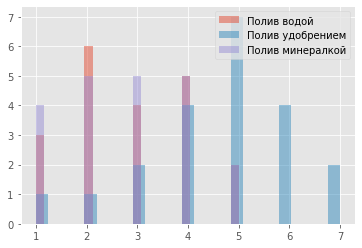

In [ ]:
plt.hist(water, bins=25,label='Полив водой', alpha=0.5);
plt.hist(nutri, bins=25,label='Полив удобрением', alpha=0.5);
plt.hist(mineral, bins=25,label='Полив минералкой', alpha=0.5);
plt.legend()
data = ('water', 'nutri', 'mineral')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !=(water=nutri=mineral)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


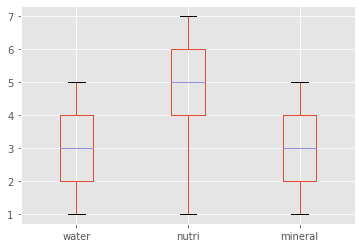

In [ ]:
c= {'water': water, 'nutri': nutri, 'mineral': mineral }
df_3 = pd.DataFrame.from_dict(c, orient='index').T
df_3.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
stats.f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

In [ ]:
# по расчетам значение статистики получилось менее 5%, следовательно нулевую гипотезу отклоняем, эффект от трёх способов полива разный.
# из визуализации видно, эффект от полива водой и минералкой одинаковый, тогда как полив удобрениями гораздо более эффективен.

### Задание 2.4

Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения.
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему?



https://drive.google.com/file/d/1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B

In [ ]:
data = pd.read_csv('PlantGrowth.csv')

In [ ]:
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [ ]:
data=data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
data.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [ ]:
data_by_group = data[['weight', 'group']].groupby('group').describe().head()
data_by_group

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

In [ ]:
# посмотрим общий вес урожая в зависимости от типа удобренияв
data_by_group = data[['weight', 'group']].groupby('group').sum().round(1).sort_values('weight', ascending=False).head()
data_by_group

,weight
group,
trt2,55.3
ctrl,50.3
trt1,46.6


In [ ]:
data_trt2 = data[data['group'] == 'trt2'].drop(columns =['group']).rename(columns={"weight": "trt2"})
data_trt1 = data[data['group'] == 'trt1'].drop(columns =['group']).rename(columns={"weight": "trt1"})
data_ctrl = data[data['group'] == 'ctrl'].drop(columns =['group']).rename(columns={"weight": "ctrl"})

In [ ]:
stats.f_oneway(data_trt2 , data_trt1, data_ctrl)

F_onewayResult(statistic=array([4.84608786]), pvalue=array([0.01590996]))

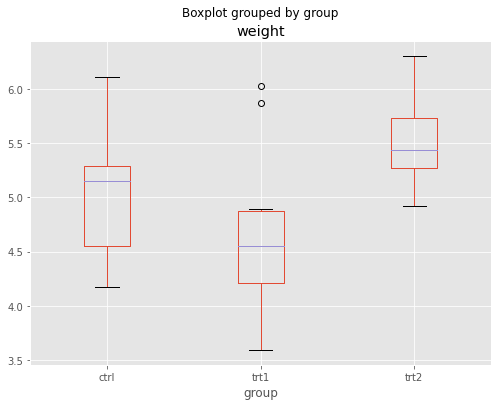

In [ ]:
data.boxplot('weight', by='group', figsize=(8, 6));

In [ ]:
# Визуально самый большой вес по урожайности у удобрения trt2
# У trt1 видны выбросы
# Расчет статистики показывает, что эффективность удобрений разная.
# Выбирать следует удобрение trt2, у которого самые лучшие показатели (наибольший общий вес =55.3кг; наибольший средний, минимальный и максимальный вес одной единицы; наименьший разброс по весу)

# A/B - тесты
## Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>


<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

## Данные A/B тестирования

https://drive.google.com/file/d/1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос.
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [ ]:
data = pd.read_csv('cookie_cats.csv')  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Задание 3.1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()[['retention_1','retention_7','sum_gamerounds']]

,retention_1,retention_7,sum_gamerounds
version,,,
gate_30,20034,8502,2344795
gate_40,20119,8279,2333530


In [ ]:
data.sum()[['retention_1','retention_7']]

retention_1    40153
retention_7    16781
dtype: object

In [ ]:
data[['retention_1']].value_counts(normalize=True)

retention_1
False          0.55479
True           0.44521
dtype: float64

In [ ]:
data[['retention_7']].value_counts(normalize=True)

retention_7
False          0.813935
True           0.186065
dtype: float64

In [ ]:
data.groupby('version').mean()[['retention_1','retention_7','sum_gamerounds']]

,retention_1,retention_7,sum_gamerounds
version,,,
gate_30,0.448188,0.190201,52.456264
gate_40,0.442283,0.182000,51.298776


In [ ]:
data[['sum_gamerounds', 'version']].groupby('version').describe().head()

sum_gamerounds                                                      
                 count       mean         std  min  25%   50%   75%      max
version                                                                     
gate_30        44700.0  52.456264  256.716423  0.0  5.0  17.0  50.0  49854.0
gate_40        45489.0  51.298776  103.294416  0.0  5.0  16.0  52.0   2640.0

In [ ]:
data[['retention_1','retention_7','version']].groupby('version').describe().head()

retention_1                      retention_7                     
              count unique    top   freq       count unique    top   freq
version                                                                  
gate_30       44700      2  False  24666       44700      2  False  36198
gate_40       45489      2  False  25370       45489      2  False  37210

In [ ]:
# Ваши выводы
# контрольные группы поделены приблизительно поровну
# количество игровых раундов, сыгранных игроком в течение первой недели после установки, чуть больше у игроков группы gate_30 (по сумме и max)
# в среднем игроки обоих групп играли по 50 уровней, т.о. обе группы переходили через ворота, и перемещение ворот никак не повлияло на среднее (можно сказать, даже ухудшился показатель: в первой группе после ворот играют ещё 20 уровней, а во второй группе только 10 уровней)
# через 1 день после установки возвращается пользователей почти в 2,5 раза больше, чем через 7 дней после установки
# при этом, похоже, что место установки ворот не влияет на решение вернуться (доли вернувшихся приблизительно равны для обоих групп)


### Задание 3.2

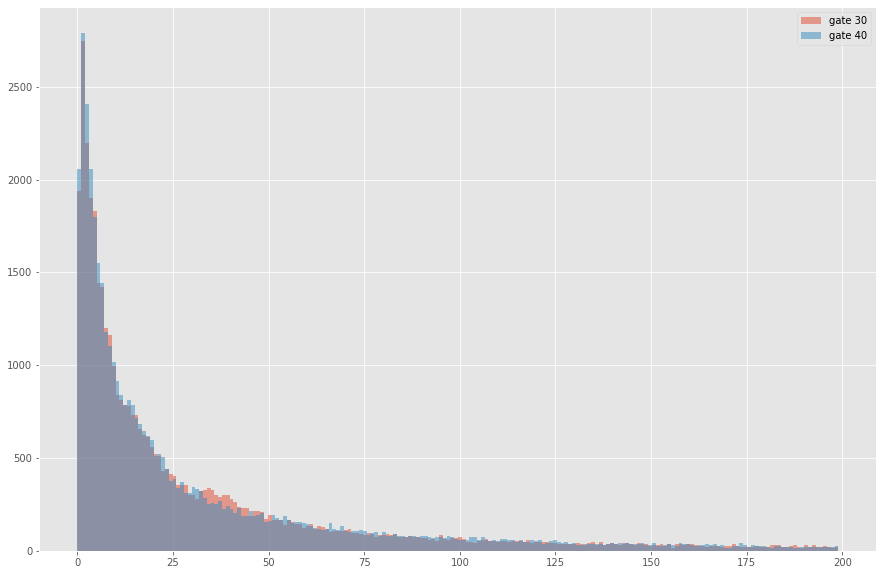

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30[v_30.sum_gamerounds < 200]
v_40 = v_40[v_40.sum_gamerounds < 200]


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 40')
plt.legend(loc='upper right')
plt.show()

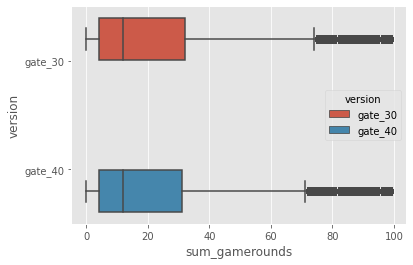

In [ ]:
data_100 = data[data.sum_gamerounds < 100]
sns.boxplot(data=data_100, x='sum_gamerounds', y='version', hue='version')


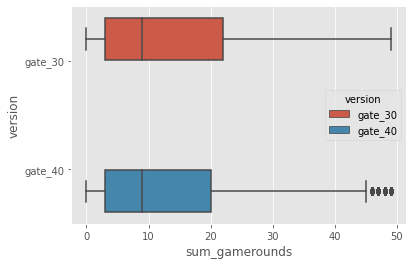

In [ ]:
data_50 = data[data.sum_gamerounds < 50]
sns.boxplot(data=data_50, x='sum_gamerounds', y='version', hue='version')


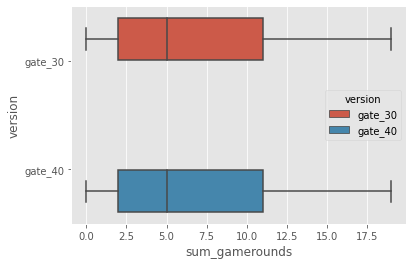

In [ ]:
data_20 = data[data.sum_gamerounds < 20]
sns.boxplot(data=data_20, x='sum_gamerounds', y='version', hue='version')


In [ ]:
# из визуализации следует, что игроки обоих групп почти с одинаковой скоростью теряют интерес к игре.
# самый резкий спад происходит на уровне 10-15 раундов.
# для группы gate_30 наблюдается небольшой всплеск в районе 30 уровня, значит эффект от ворот все-таки есть
# для группы gate_40 в районе 40 уровня активности не видно
# думаю, ворота нужно перенести на 10-15 уровень.

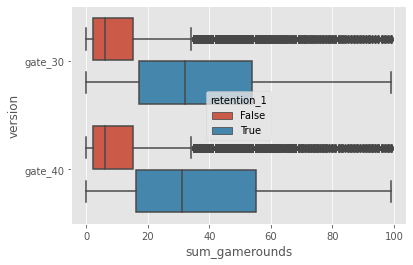

In [ ]:
data_100 = data[data.sum_gamerounds < 100]
sns.boxplot(data=data_100, x='sum_gamerounds', y='version', hue="retention_1")


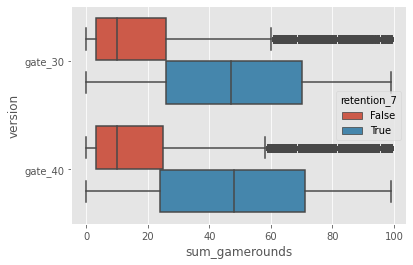

In [ ]:
data_100 = data[data.sum_gamerounds < 100]
sns.boxplot(data=data_100, x='sum_gamerounds', y='version', hue="retention_7")


In [ ]:
# Ваши выводы/гипотезы
# на количество вернувшихся место установки ворот, похоже, совсем не влияет

### Задание 3.3

#### retention_7

In [ ]:
# Применяем Bootstrap, чтобы наглядно убедиться в наличии различий
N = 10_000
k = 5_000

X = np.zeros((N, 2))
for i, v in enumerate(['30', '40']):
    v = data[data.version == f'gate_{v}'].retention_7.sample(N*k, replace=True).values.reshape((k, -1))
    print(v.shape)
    X[:, i] = v.mean(axis=0)

(5000, 10000)
(5000, 10000)


In [ ]:
X.shape

(10000, 2)

In [ ]:
X

array([[0.1982, 0.1756],
       [0.1912, 0.1772],
       [0.1918, 0.1846],
       ...,
       [0.1952, 0.182 ],
       [0.1928, 0.1832],
       [0.207 , 0.1726]])

<Figure size 1296x576 with 0 Axes>

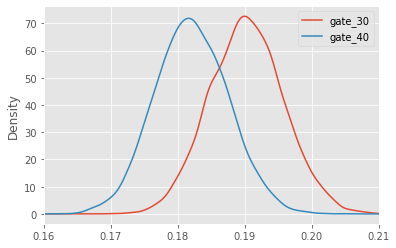

In [ ]:
plt.figure(figsize=(18, 8));
ax = pd.DataFrame(X, columns=['gate_30', 'gate_40']).plot(kind='density')
ax.set_xlim(0.16, 0.21);

In [ ]:
# сделайте выводы, используя t-тест
# для retention_7
data_7_30 = np.array(X[:,0])
data_7_40 = np.array(X[:,1])
stats.ttest_ind(data_7_30, data_7_40,equal_var = False)
# Вывод: отклоняем нулевую гипотезу (которая казалась очевидной при визуализации в задании 3.2) - место установки ворот влияет на количество вернувшихся

Ttest_indResult(statistic=105.05643093413401, pvalue=0.0)

#### retention_1

In [ ]:
# Применяем Bootstrap, чтобы наглядно убедиться в наличии различий
N = 10_000
k = 5_000

X1 = np.zeros((N, 2))
for i, v in enumerate(['30', '40']):
    v = data[data.version == f'gate_{v}'].retention_1.sample(N*k, replace=True).values.reshape((k, -1))
    print(v.shape)
    X1[:, i] = v.mean(axis=0)

(5000, 10000)
(5000, 10000)


In [ ]:
X1.shape

(10000, 2)

In [ ]:
X1

array([[0.4334, 0.4362],
       [0.443 , 0.438 ],
       [0.4458, 0.4452],
       ...,
       [0.4476, 0.4428],
       [0.4446, 0.4408],
       [0.4474, 0.438 ]])

<Figure size 1296x576 with 0 Axes>

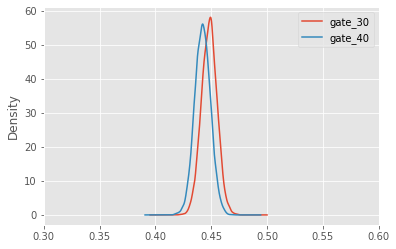

In [ ]:
plt.figure(figsize=(18, 8));
ax = pd.DataFrame(X1, columns=['gate_30', 'gate_40']).plot(kind='density')
ax.set_xlim(0.30, 0.60);

In [ ]:
# сделайте выводы, используя t-тест
# для retention_1
data_1_30 = np.array(X1[:,0])
data_1_40 = np.array(X1[:,1])
stats.ttest_ind(data_1_30, data_1_40,equal_var = False)
# Вывод: отклоняем нулевую гипотезу (которая казалась очевидной при визуализации в задании 3.2) - место установки ворот влияет на количество вернувшихся


Ttest_indResult(statistic=59.770669126374685, pvalue=0.0)

# Покемоны и AB-тестирование
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

https://drive.google.com/file/d/1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задание 4.1
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
pokemon_data = pokemon.rename(columns={"Class 1": "Class1", "Class 2": "Class2"})
pokemon_data.Class1.unique(), pokemon_data.Class2.unique()

(array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
        'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
        'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object),
 array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
        'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
        'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object))

In [ ]:
pokemon_data.groupby('Class1').Class1.count()

Class1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Class1, dtype: int64

In [ ]:
pokemon_index_1 = pokemon_data[(pokemon_data['Class1'] == 'Grass') & (pokemon_data['Class2'] == 'Rock')].index
pokemon_data_1=pokemon_data.drop(pokemon_index_1)

In [ ]:
pokemon_index_2 = pokemon_data_1[(pokemon_data_1['Class1'] == 'Rock') & (pokemon_data_1['Class2'] == 'Grass')].index
pokemon_data_2=pokemon_data_1.drop(pokemon_index_2)

In [ ]:
pokemon_data_2.groupby('Class1').Class1.count()

Class1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         42
Steel        27
Water       112
Name: Class1, dtype: int64

In [ ]:
# удалили двух покемонов, которые относились к обоим классам

In [ ]:
pokemon_Grass1 = pokemon_data_2.loc[pokemon_data_2.Class1== 'Grass']
pokemon_Grass2 = pokemon_data_2.loc[pokemon_data_2.Class2== 'Grass']
pokemon_Rock1 = pokemon_data_2.loc[pokemon_data_2.Class1== 'Rock']
pokemon_Rock2 = pokemon_data_2.loc[pokemon_data_2.Class2== 'Rock']

In [ ]:
pokemon_Grass_merged = pokemon_Grass1.append(pokemon_Grass2, ignore_index=True)
pokemon_Rock_merged = pokemon_Rock1.append(pokemon_Rock2, ignore_index=True)

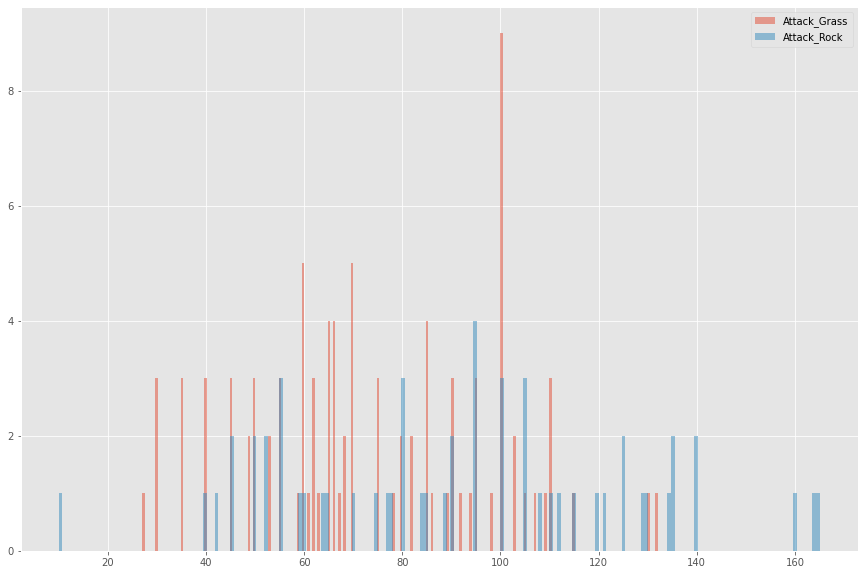

Нулевая гипотеза: Attack_Grass=Attack_Rock
Альтернативная гипотеза: !=(Attack_Grass=Attack_Rock)


In [ ]:
pokemon_Grass=pokemon_Grass_merged['Attack']
pokemon_Rock=pokemon_Rock_merged['Attack']



bins = 200
plt.figure(figsize=(15, 10))
plt.hist(pokemon_Grass, bins=bins, alpha=0.5, label='Attack_Grass')
plt.hist(pokemon_Rock, bins=bins, alpha=0.5, label='Attack_Rock')
plt.legend(loc='upper right')
plt.show()
data = ('Attack_Grass', 'Attack_Rock')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
print(len(pokemon_Grass), len(pokemon_Rock))

93 56


In [ ]:
stats.f_oneway(pokemon_Grass, pokemon_Rock)
# сделала для проверки ttеста. Смущает разный размер выборок. Получается, это несущественно?

F_onewayResult(statistic=13.908853861099336, pvalue=0.00027333381459902556)

In [ ]:
stats.ttest_ind(pokemon_Grass, pokemon_Rock)
# Вывод: отклоняем нулевую гипотезу, из знака "-"  statistic следует, что среднее должно быть больше у выборки pokemon_Rock

Ttest_indResult(statistic=-3.729457582692065, pvalue=0.00027333381459902653)

In [ ]:
pokemon_Grass.mean()

73.73118279569893

In [ ]:
pokemon_Rock.mean()

91.78571428571429

In [ ]:
# Профессор Оук прав в том, что эти классы отличаются по силе атаки. Но он НЕ прав в прогнозе лидера: покемоны в классе grass имеют МЕНЕЕ сильную обычную атаку, чем у покемонов в классе rock.

### Задание 4.2

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon_index_3 = pokemon_data[(pokemon_data['Class1'] == 'Water') & (pokemon_data['Class2'] == 'Normal')].index
pokemon_data_3=pokemon_data.drop(pokemon_index_3)

In [ ]:
pokemon_index_4 = pokemon_data_3[(pokemon_data_3['Class1'] == 'Normal') & (pokemon_data_3['Class2'] == 'Water')].index
pokemon_data_4=pokemon_data_3.drop(pokemon_index_4)

In [ ]:
pokemon_data_4.groupby('Class1').Class1.count()

Class1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       97
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Class1, dtype: int64

In [ ]:
# удалили одного покемона, который относился к обоим классам

In [ ]:
pokemon_Water1 = pokemon_data_4.loc[pokemon_data_4.Class1== 'Water']
pokemon_Water2 = pokemon_data_4.loc[pokemon_data_4.Class2== 'Water']
pokemon_Normal1 = pokemon_data_4.loc[pokemon_data_4.Class1== 'Normal']
pokemon_Normal2 = pokemon_data_4.loc[pokemon_data_4.Class2== 'Normal']

In [ ]:
pokemon_Water_merged = pokemon_Water1.append(pokemon_Water2, ignore_index=True)
pokemon_Normal_merged = pokemon_Normal1.append(pokemon_Normal2, ignore_index=True)

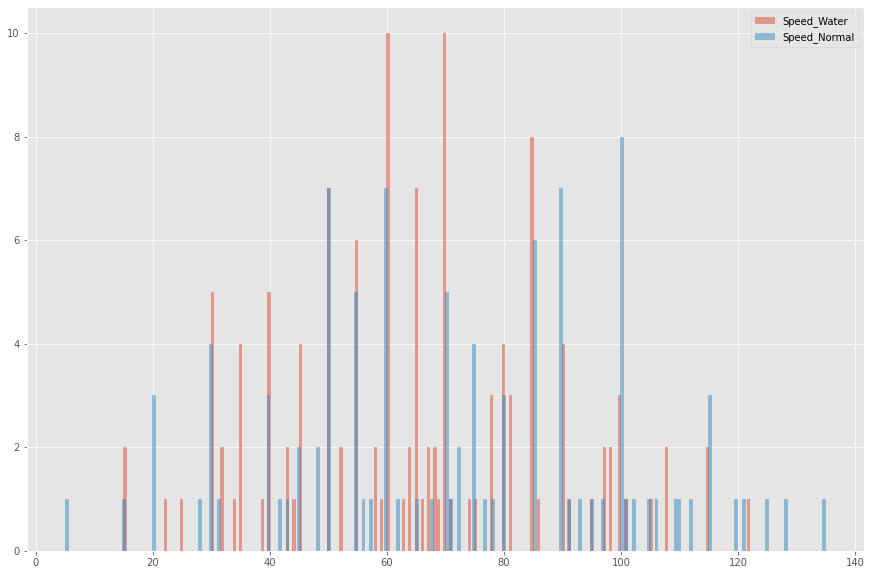

Нулевая гипотеза: Speed_Water=Speed_Normal
Альтернативная гипотеза: !=(Speed_Water=Speed_Normal)


In [ ]:
pokemon_Water=pokemon_Water_merged['Speed']
pokemon_Normal=pokemon_Normal_merged['Speed']



bins = 200
plt.figure(figsize=(15, 10))
plt.hist(pokemon_Water, bins=bins, alpha=0.5, label='Speed_Water')
plt.hist(pokemon_Normal, bins=bins, alpha=0.5, label='Speed_Normal')
plt.legend(loc='upper right')
plt.show()
data = ('Speed_Water', 'Speed_Normal')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
print(len(pokemon_Water), len(pokemon_Normal))

125 101


In [ ]:
stats.ttest_ind(pokemon_Water, pokemon_Normal)
# Вывод: отклоняем нулевую гипотезу, из знака "-"" у statistic следует, что среднее должно быть больше у выборки pokemon_Normal

Ttest_indResult(statistic=-2.150913330007121, pvalue=0.03255353551391033)

In [ ]:
pokemon_Water.mean()

64.936

In [ ]:
pokemon_Normal.mean()

72.25742574257426

In [ ]:
# Профессор Оук прав в том, что эти классы отличаются по скорости движения. Но он НЕ прав в прогнозе лидера: покемоны в классе Water двигаются в среднем медленнее, чем покемоны в классе Normal.

### Задание 4.3

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
pokemon_data_=pokemon_data.drop(['pid', 'Class1', 'Class2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Legendary'], axis=1)

In [ ]:
pokemon_data.groupby('Name').Name.count()

Name
Abomasnow                1
Abra                     1
Absol                    1
Accelgor                 1
Aegislash Blade Forme    1
                        ..
Zoroark                  1
Zorua                    1
Zubat                    1
Zweilous                 1
Zygarde Half Forme       1
Name: Name, Length: 799, dtype: int64

In [ ]:
pokemon_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    799 non-null    object
 1   Speed   800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [ ]:
new_pokemon_data = pokemon_data_.dropna(axis = 0, how ='any')

In [ ]:
new_pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    799 non-null    object
 1   Speed   799 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [ ]:
treathed_pokemon_data = new_pokemon_data[(new_pokemon_data['Name'] == 'Mega Beedrill') & (new_pokemon_data['Name'] == 'Mega Alakazam') & (new_pokemon_data['Name'] == 'Mega Lopunny') & (new_pokemon_data['Name'] == 'Deoxys Normal Forme')].index
regular_pokemon_data=new_pokemon_data.drop(treathed_pokemon_data)

In [ ]:
pokemon_Mega_Beedrill = new_pokemon_data.loc[new_pokemon_data.Name== 'Mega Beedrill']
pokemon_Mega_Alakazam = new_pokemon_data.loc[new_pokemon_data.Name== 'Mega Alakazam']
pokemon_Deoxys_Normal_Forme = new_pokemon_data.loc[new_pokemon_data.Name== 'Deoxys Normal Forme']
pokemon_Mega_Lopunny = new_pokemon_data.loc[new_pokemon_data.Name== 'Mega Lopunny']
treathed_pokemon_result = pd.concat([pokemon_Mega_Beedrill, pokemon_Mega_Alakazam, pokemon_Deoxys_Normal_Forme, pokemon_Mega_Lopunny])

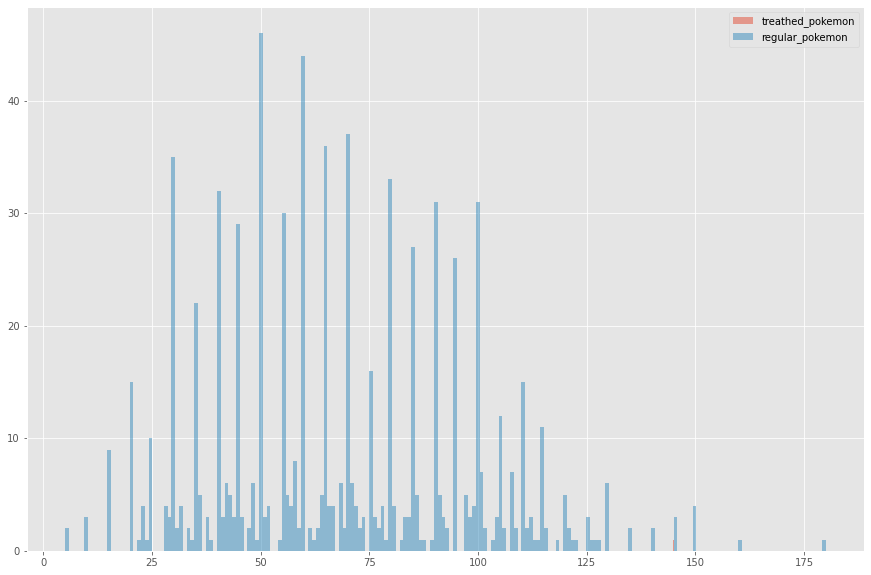

Нулевая гипотеза: treathed_pokemon=regular_pokemon
Альтернативная гипотеза: !=(treathed_pokemon=regular_pokemon)


In [ ]:
treathed_pokemon=treathed_pokemon_result['Speed']
regular_pokemon=regular_pokemon_data['Speed']



bins = 200
plt.figure(figsize=(15, 10))
plt.hist(treathed_pokemon, bins=bins, alpha=0.5, label='treathed_pokemon')
plt.hist(regular_pokemon, bins=bins, alpha=0.5, label='regular_pokemon')
plt.legend(loc='upper right')
plt.show()
data = ('treathed_pokemon', 'regular_pokemon')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
stats.ttest_ind(treathed_pokemon, regular_pokemon)
# Вывод: отклоняем нулевую гипотезу, из знака "+"" у statistic следует, что среднее должно быть больше у выборки treathed_pokemon

Ttest_indResult(statistic=5.278125464772226, pvalue=1.6818651696096866e-07)

In [ ]:
treathed_pokemon.mean()

145.0

In [ ]:
regular_pokemon.mean()

68.24405506883605

In [ ]:
# Профессор Оук прав, что его сыворотка способна ускорить покемона. Средняя скорость тестовой группы значительно превышает среднюю скорость остальных покемонов.

### Задание 4.4

Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
cols = ['HP','Attack','Defense']
pokemon_data_sum = pokemon_data.eval('Sum_ = {}'.format('+'.join(cols)))
pokemon_data_sum.head()

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum_
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134


In [ ]:
pokemon_data_sum_multi = pokemon_data_sum.eval('Multi_ = {}'.format('*'.join(cols)))
pokemon_data_sum_multi.head()

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum_,Multi_
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [ ]:
Legendary_pokemon =pokemon_data_sum_multi.loc[(pokemon_data_sum_multi['Legendary']==True)]
rest_pokemon =pokemon_data_sum_multi.loc[(pokemon_data_sum_multi['Legendary']==False)]

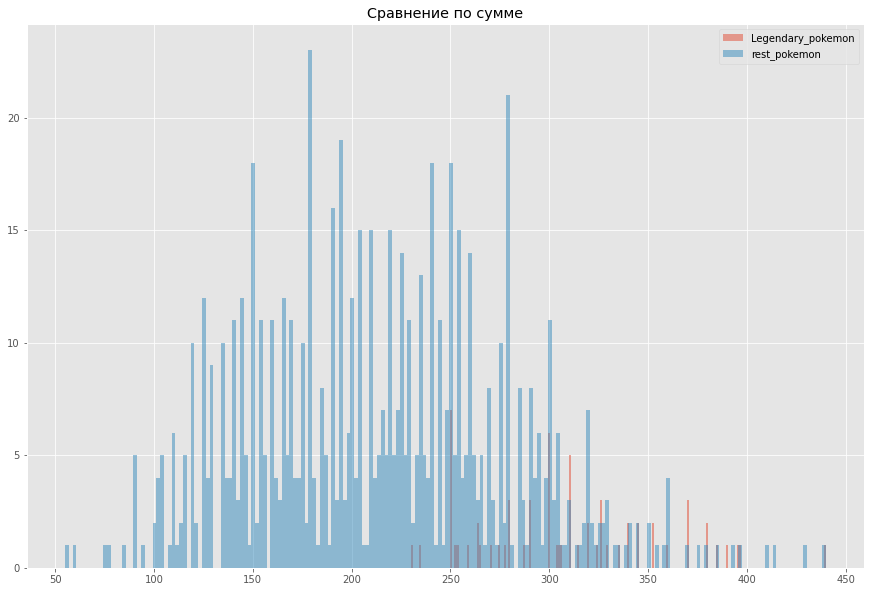

Нулевая гипотеза: Legendary_pokemon=rest_pokemon
Альтернативная гипотеза: !=(Legendary_pokemon=rest_pokemon)


In [ ]:
Legendary_pokemon=Legendary_pokemon['Sum_']
rest_pokemon=rest_pokemon['Sum_']



bins = 200
plt.figure(figsize=(15, 10))
plt.hist(Legendary_pokemon, bins=bins, alpha=0.5, label='Legendary_pokemon')
plt.hist(rest_pokemon, bins=bins, alpha=0.5, label='rest_pokemon')
plt.legend(loc='upper right')
plt.title('Сравнение по сумме')
plt.show()
data = ('Legendary_pokemon', 'rest_pokemon')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
stats.ttest_ind(Legendary_pokemon, rest_pokemon)
# Вывод: отклоняем нулевую гипотезу, из statistic следует, что среднее должно быть больше у выборки Legendary_pokemon

Ttest_indResult(statistic=11.591852366462316, pvalue=7.970942205722087e-29)

In [ ]:
Legendary_pokemon.mean()

309.0769230769231

In [ ]:
rest_pokemon.mean()

214.4108843537415

In [ ]:
# Профессор Оук прав, сумма характеристик HP,Attack,Defense у легендарных покемонов действительно выше, чем у других покемонов.

In [ ]:
stats.ttest_ind(Legendary_pokemon, rest_pokemon)
# Вывод: отклоняем нулевую гипотезу, из statistic следует, что среднее должно быть больше у выборки Legendary_pokemon

Ttest_indResult(statistic=11.591852366462316, pvalue=7.970942205722087e-29)

In [ ]:
Legendary_pokemon.mean()

309.0769230769231

In [ ]:
rest_pokemon.mean()

214.4108843537415

In [ ]:
# Профессор Оук прав, произведение характеристик HP,Attack,Defense у легендарных покемонов действительно выше, чем у других покемонов.

### Задание 4.5

Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
best_defence_class_data_1=pokemon_data.loc[pokemon_data['Class1'].isin(best_defence_class)]

In [ ]:
best_defence_class_data_1_=best_defence_class_data_1.drop(['pid', 'Name', 'Class2','HP', 'Attack', 'Speed', 'Sp. Atk', 'Sp. Def', 'Legendary'], axis=1)

In [ ]:
best_defence_class_data_2=pokemon_data.loc[pokemon_data['Class2'].isin(best_defence_class)]

In [ ]:
best_defence_class_data_2_=best_defence_class_data_2.drop(['pid', 'Name', 'Class1','HP', 'Attack', 'Speed', 'Sp. Atk', 'Sp. Def', 'Legendary'], axis=1)

In [ ]:
best_defence_class_data = pd.concat([best_defence_class_data_1_,best_defence_class_data_2_])

In [ ]:
best_defence_class_Rock = best_defence_class_data[(best_defence_class_data['Class1']== 'Rock') | (best_defence_class_data['Class2']== 'Rock') ]
Rock=best_defence_class_Rock['Defense'].to_list()

In [ ]:
best_defence_class_Ground = best_defence_class_data[(best_defence_class_data['Class1']== 'Ground') | (best_defence_class_data['Class2']== 'Ground')]
Ground=best_defence_class_Ground['Defense'].to_list()

In [ ]:
best_defence_class_Steel = best_defence_class_data[(best_defence_class_data['Class1']== 'Steel') | (best_defence_class_data['Class2']== 'Steel')]
Steel=best_defence_class_Steel['Defense'].to_list()

In [ ]:
best_defence_class_Ice = best_defence_class_data[(best_defence_class_data['Class1']== 'Ice') | (best_defence_class_data['Class2']== 'Ice')]
Ice=best_defence_class_Ice['Defense'].to_list()

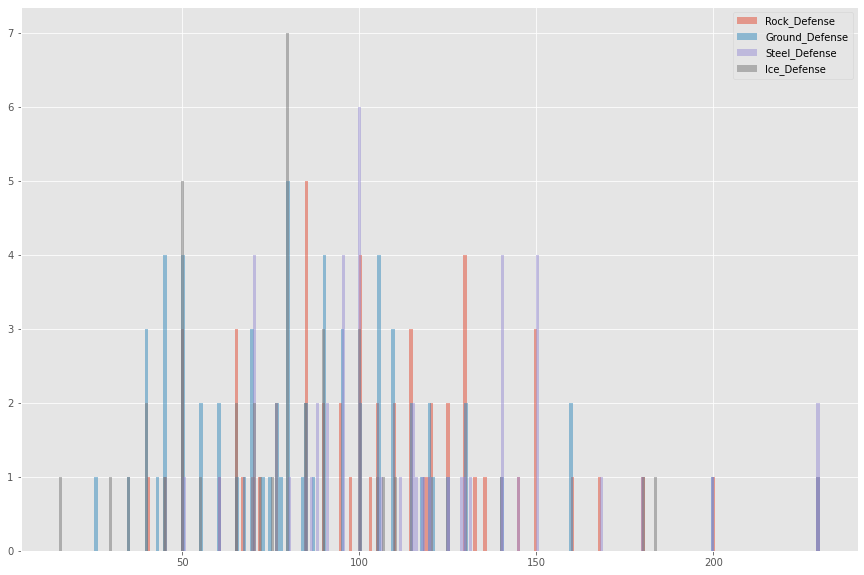

Нулевая гипотеза: Rock=Ground=Steel=Ice
Альтернативная гипотеза: !=(Rock=Ground=Steel=Ice)


In [ ]:
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(Rock, bins=bins, alpha=0.5, label='Rock_Defense')
plt.hist(Ground, bins=bins, alpha=0.5, label='Ground_Defense')
plt.hist(Steel, bins=bins, alpha=0.5, label='Steel_Defense')
plt.hist(Ice, bins=bins, alpha=0.5, label='Ice_Defense')
plt.legend(loc='upper right')
plt.show()
data = ('Rock', 'Ground', 'Steel', 'Ice')
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!=({"=".join(data)})')

In [ ]:
stats.f_oneway(Rock, Ground, Steel, Ice)

F_onewayResult(statistic=10.820124083047308, pvalue=1.231528168152447e-06)

In [ ]:
# Профессор Оук НЕ прав. Выделенные им четыре класса покемонов отличаются по "силе обычной защиты" Defense.